In [1]:
import os
import glob
import LatLon 
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)

# plot
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
sns.set_style("whitegrid")
from pysurvey.plot import setup, legend, icolorbar, density, minmax

import geoplotlib
import geoplotlib.colors

In [2]:
clean = pd.DataFrame.from_csv('/Users/ajmendez/tmp/flight/flight_clean_3.csv')

In [52]:
clean['flightid'] = flights['flight']+'.'+flights['flightindex'].apply(str)

In [35]:
clean[clean['flightpoints'] > 100].groupby(['flight'], as_index=False).count().sort('date')

/Users/ajmendez/.local/canopy/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,flight,date,time,alt,lat,lon,flightnum,datenum,hour,weekday,normtime,heading_deg,distance,heading,x,y,px,py,flightindex,flightpoints
163,40621B,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101
1743,AB7F24,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
21,06A053,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
876,A4F6DD,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
715,A380F1,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,A9AD36,5672,5672,5672,5672,5672,5672,5672,5672,5672,5672,5672,5672,5672,5672,5672,5672,5672,5672,5672
1077,A719AA,6432,6432,6432,6432,6432,6432,6432,6432,6432,6432,6432,6432,6432,6432,6432,6432,6432,6432,6432
1411,A9C737,6474,6474,6474,6474,6474,6474,6474,6474,6474,6474,6474,6474,6474,6474,6474,6474,6474,6474,6474
670,A313B4,7631,7631,7631,7631,7631,7631,7631,7631,7631,7631,7631,7631,7631,7631,7631,7631,7631,7631,7631


15371


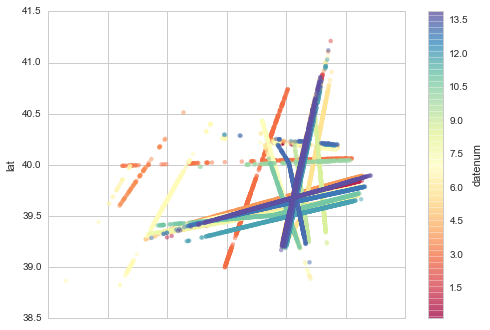

In [72]:
isgood = ( (clean['flight'] == 'A719AA') | 
#            (clean['flight'] == 'A9C737') |
#            (clean['flight'] == 'A313B4') |
           (clean['flight'] == '406696') )
flights = clean[isgood]
print len(flights)
# flights.plot('flightindex', 'flightpoints', kind='scatter')
flights.plot('lon', 'lat', kind='scatter', c='datenum', 
             cmap=pylab.cm.Spectral, lw=0, alpha=0.5)

# pylab.axhline(10)

In [39]:
colors = geoplotlib.colors.create_set_cmap(flights['flightnum'], pylab.cm.jet)

geoplotlib.tiles_provider('darkmatter')
for fi in np.unique(flights['flightnum']):
    geoplotlib.scatter(flights[flights['flightnum'] == fi], color=colors[fi])
bbox = geoplotlib.utils.BoundingBox(40.5,-78.0,38.5,-76)
geoplotlib.set_bbox(bbox)
geoplotlib.inline(800)

In [84]:
import sys
sys.path.append('/Users/ajmendez/tmp/sklearn-expertsys/')
import RuleListClassifier
reload(RuleListClassifier)
from RuleListClassifier import *
from sklearn.datasets.mldata import fetch_mldata
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [78]:
feature_labels = ["#Pregnant","Glucose concentration test","Blood pressure(mmHg)","Triceps skin fold thickness(mm)","2-Hour serum insulin (mu U/ml)","Body mass index","Diabetes pedigree function","Age (years)"]
data = fetch_mldata("diabetes") # get dataset

y = (data.target+1)/2
Xtrain, Xtest, ytrain, ytest = train_test_split(data.data, y) # split

In [ ]:
clf = RuleListClassifier(max_iter=1000, class1label="diabetes", verbose=False)
clf.fit2(Xtrain, ytrain, feature_labels=feature_labels)
print "RuleListClassifier Accuracy:", clf.score(Xtest, ytest), "Learned interpretable model:\n", clf


In [80]:
clf = RuleListClassifier(max_iter=10000, class1label="diabetes", verbose=False)
clf.fit(Xtrain, ytrain, feature_labels=feature_labels)
print "RuleListClassifier Accuracy:", clf.score(Xtest, ytest), "Learned interpretable model:\n", clf
print "RandomForestClassifier Accuracy:", RandomForestClassifier().fit(Xtrain, ytrain).score(Xtest, ytest)


RuleListClassifier Accuracy: 0.697916666667 Learned interpretable model:
Trained RuleListClassifier for detecting diabetes
IF Glucose concentration test : -inf_to_99.5 THEN probability of diabetes: 8.4% (4.6%-13.3%)
ELSE IF Body mass index : -inf_to_27.8499995 THEN probability of diabetes: 15.5% (9.4%-22.7%)
ELSE IF 2-Hour serum insulin (mu U/ml) : 36.5_to_119.5 THEN probability of diabetes: 20.0% (9.8%-32.7%)
ELSE IF Glucose concentration test : 167.0_to_inf THEN probability of diabetes: 92.9% (84.9%-98.0%)
ELSE IF #Pregnant : 6.5_to_inf THEN probability of diabetes: 75.4% (64.0%-85.3%)
ELSE IF Glucose concentration test : 99.5_to_130.5 THEN probability of diabetes: 32.3% (23.4%-41.9%)
ELSE probability of diabetes: 54.4% (42.6%-66.0%)

RandomForestClassifier Accuracy: 0.734375


In [73]:
feature_labels = ['lat', 'lon', 'alt', 'datenum']
Xtrain = flights[feature_labels]
ytrain = flights['flight'] == 'A719AA'
clf = RuleListClassifier(max_iter=1000, 
                         class1label="flight", 
                         verbose=False)
clf.fit(Xtrain, ytrain, feature_labels=feature_labels)


RuleListClassifier(alpha=array([ 1.,  1.]), class1label='flight',
          listlengthprior=3, listwidthprior=1, max_iter=1000,
          maxcardinality=2, minsupport=10, n_chains=3, verbose=False)

In [76]:
print "RuleListClassifier Accuracy:", clf.score(Xtrain, ytrain), "Learned interpretable model:\n", clf
print "RandomForestClassifier Accuracy:", RandomForestClassifier().fit(Xtrain, ytrain).score(Xtrain, ytrain)

 RuleListClassifier Accuracy: 0.982499512068 Learned interpretable model:
Trained RuleListClassifier for detecting flight
IF alt : -inf_to_32962.5 THEN probability of flight: 0.0% (0.0%-0.1%)
ELSE IF lon : -77.015515_to_-76.948455 THEN probability of flight: 100.0% (99.8%-100.0%)
ELSE IF datenum : 11.4166205208_to_11.8940003819 THEN probability of flight: 0.6% (0.0%-2.0%)
ELSE IF lon : -76.948455_to_-76.8153 THEN probability of flight: 100.0% (99.9%-100.0%)
ELSE IF datenum : 13.6763937904_to_13.8865028008 AND lat : 39.474705_to_39.782185 THEN probability of flight: 0.3% (0.0%-1.2%)
ELSE IF datenum : 4.07091896405_to_4.9111564004 THEN probability of flight: 0.4% (0.0%-1.4%)
ELSE IF datenum : 8.23224320595_to_9.6481313657 THEN probability of flight: 99.8% (99.3%-100.0%)
ELSE IF datenum : 3.72189303814_to_3.91504727426 THEN probability of flight: 0.5% (0.0%-1.9%)
ELSE IF lon : -77.204215_to_-77.039575 THEN probability of flight: 99.8% (99.2%-100.0%)
ELSE IF datenum : 1.40955446754_to_3.01